<h1><strong>Tugas</strong></h1>

- Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN
- Anda diperbolehkan melakukan eksplorasi terhadap,
  - Metode pra pengolahan
  - Pemilihan fitur
  - Arsitektur ANN
  - Fungsi Aktiviasi
- ANN diimplementasikan dengan menggunakan tensorflow.
- **DIKERJAKAN SECARA BERKELOMPOK**
- **JELASKAN HASIL YANG ANDA DAPATKAN,**
  - AKURASI
  - CONFUSION MATRIX
  - KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

**Pra Pengolahan Data**

**Langkah 1 - Import Library**

In [ ]:
import numpy as np # menyediakan dukungan untuk array multidimensi dan berbagai fungsi matematika
import pandas as pd # menyediakan struktur data dan fungsi operasi data
import tensorflow as tf # merupakan salah satu pustaka yang sangat populer untuk deep learning dan machine learning
import matplotlib.pyplot as plt # Membantu dalam memvisualisasikan data

**Langkah 2 - Load Data dan Split Data**

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

**Langkah 3 - Ukuran Data**

In [ ]:
print('The shape of the training inputs:', X_train.shape)
print('The shape of the training labels:',y_train.shape)
print('The shape of the testing inputs:',X_test.shape)
print('The shape of the testing labels:',y_test.shape)

The shape of the training inputs: (60000, 28, 28)
The shape of the training labels: (60000,)
The shape of the testing inputs: (10000, 28, 28)
The shape of the testing labels: (10000,)


**Langkah 4 - Sampel Data**

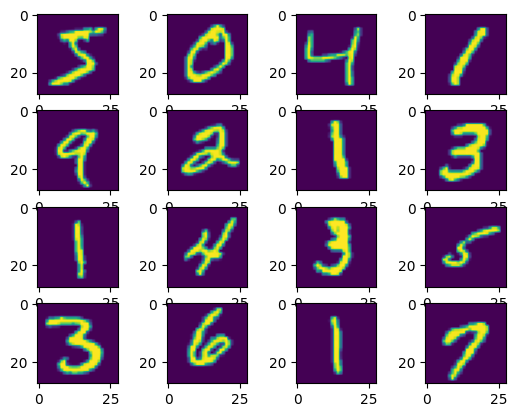

In [ ]:
# plotting the first 16 images in the train set of MNIST

fig, axs = plt.subplots(4, 4)
cnt = 0
for i in range(4):
     for j in range(4):
         axs[i, j].imshow(X_train[cnt])
         cnt += 1

**Langkah 5 - Normalisasi Data**

In [ ]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

**Membuat Model ANN**

**Langkah 1 - Inisiasi Model ANN**

In [ ]:
ann = tf.keras.models.Sequential()

**Langkah 2 - Membuat Input Layer**

In [ ]:
ann.add(tf.keras.layers.Flatten(input_shape=(28,28))) # Layer Flatten mengubah format data dari bentuk matriks 2D (atau lebih tinggi) menjadi vektor 1D, yang selanjutnya digunakan Dense Layer
# input_shape=(28,28) menetukan ukuran input

**Langkah 3 - Membuat Hidden Layer Pertama**

In [ ]:
ann.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu)) # Menambahkan Dense Layer dengan fungsi aktivasi Rectified Linear Unit (ReLU), dengan 128 neuron

**Langkah 4 - Membuat Hidden Layer Kedua**

In [ ]:
ann.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))

**Langkah 4 - Membuat Output Layer**

In [ ]:
ann.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)) # Menambahkan Dense Layer dengan 10 neuron untuk output dan fungsi aktivasi berupa Softmax
# Fungsi aktivasi Softmax mengubah setiap nilai input menjadi nilai antara 0 dan 1, yang bisa diinterpretasikan sebagai probabilitas, dan memastikan bahwa total semua probabilitas adalah 1.

**Training Model**

**Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN**

In [ ]:
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # Optimizer ADAM (Adaptive Moment Estimation) untuk memperbarui bobot
# sparse_categorical_crossentropy, sebagai loss function untuk klasifikasi multikelas
# ‘accuracy’ sebagai metrik yang menghitung persentase prediksi

**Langkah 2 - Fitting Model**

In [ ]:
ann.fit(X_train, y_train, epochs=100, batch_size=100) # Melatih ANN model dengan maksimal 100 Epoch atau iterasi dan 100 sampel latihan

Epoch 1/100
600/600 [==============================] - 4s 5ms/step - loss: 0.3588 - accuracy: 0.9028
Epoch 2/100
600/600 [==============================] - 2s 4ms/step - loss: 0.1426 - accuracy: 0.9570
Epoch 3/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0983 - accuracy: 0.9695
Epoch 4/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0743 - accuracy: 0.9769
Epoch 5/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0570 - accuracy: 0.9826
Epoch 6/100
600/600 [==============================] - 3s 4ms/step - loss: 0.0463 - accuracy: 0.9857
Epoch 7/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0370 - accuracy: 0.9881
Epoch 8/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0312 - accuracy: 0.9899
Epoch 9/100
600/600 [==============================] - 2s 4ms/step - loss: 0.0251 - accuracy: 0.9920
Epoch 10/100
600/600 [==============================] - 3s 5ms/step - loss: 0.0187 - accura

**Langkah 4 - Evaluasi Model**

In [ ]:
loss, accuracy = ann.evaluate(X_test, y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.2002 - accuracy: 0.9785
0.2001701295375824
0.9785000085830688


**Membuat Prediksi**

**Prediksi Dengan Data Testing**

In [ ]:
y_pred = np.argmax(ann.predict(X_test), axis=-1) # melakukan prediksi nilai berdasarkan X_test

313/313 [==============================] - 1s 2ms/step


**Cek Akurasi dan Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score # Berguna dalam menghitung akurasi skor dan confusion matrix

cm = confusion_matrix(y_test, y_pred) # menghitung confusion matrix berdasarkan hasil tes dan prediksi
print(cm) # menampilkan hasil confusion matrix
accuracy_score(y_test, y_pred) # menghitung dan menampilkan akurasi matrix berdasarkan hasil tes dan prediksi

[[ 970    0    2    1    1    1    1    1    2    1]
 [   0 1125    3    1    0    0    2    0    4    0]
 [   5    0 1006    1    3    1    3    7    6    0]
 [   1    0    1  991    0    4    0    2    6    5]
 [   0    0    5    0  961    0    6    2    1    7]
 [   2    0    0   10    0  868    3    1    5    3]
 [   4    2    2    0    4    5  940    0    1    0]
 [   1    3   14    1    0    0    1 1003    2    3]
 [   5    1    3    4    3    5    3    4  940    6]
 [   1    2    0    3   12    3    0    4    3  981]]


0.9785

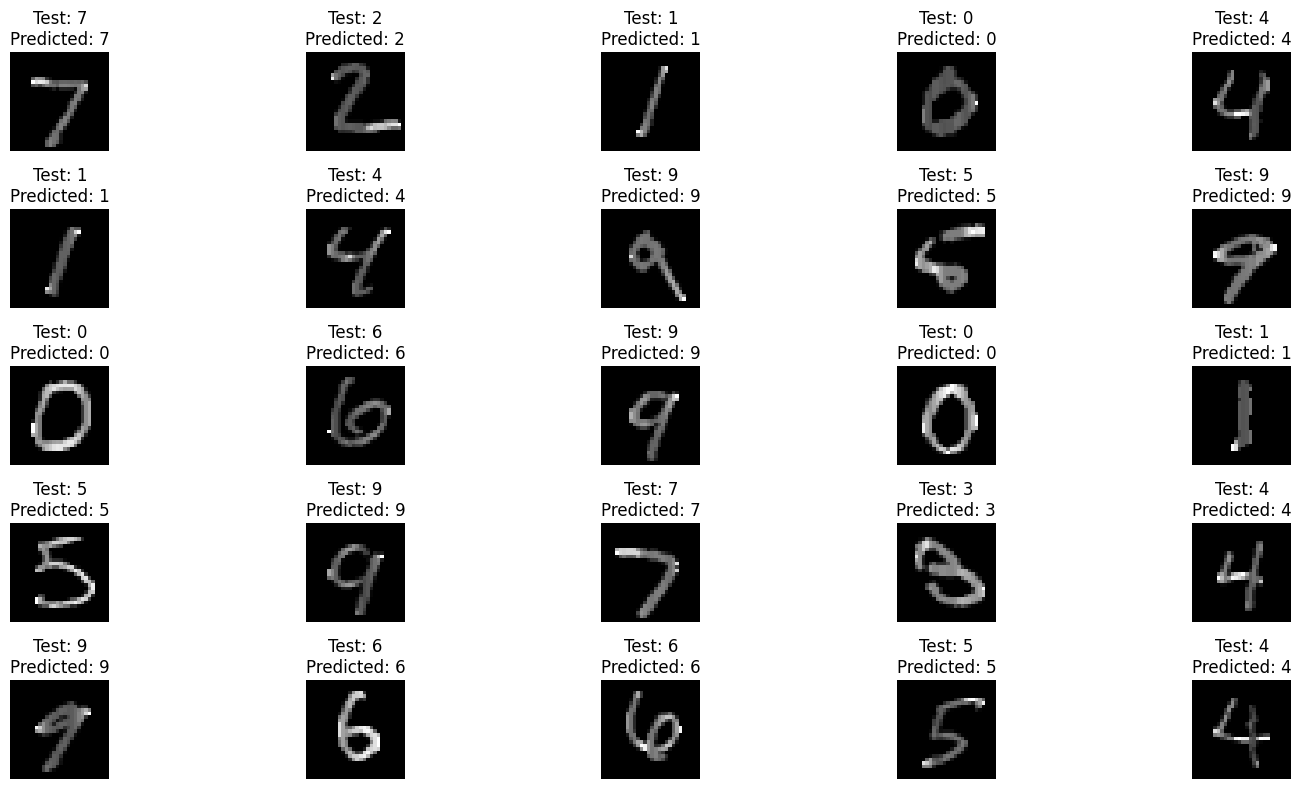

In [ ]:
# Tentukan jumlah citra yang ingin ditampilkan
n_images = 25

# Ambil n_images citra dari data pengujian
sample_images = X_test[:n_images]
sample_labels = y_test[:n_images]

# Buat subplot untuk menampilkan citra-citra ini
plt.figure(figsize=(16, 8))
for i in range(n_images):
    plt.subplot(5, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')

    plt.title(f"Test: {sample_labels[i]}\nPredicted: {y_pred[i]}",
              color='black'
              if sample_labels[i] == y_pred[i]
              else 'red')
    plt.axis('off')

plt.tight_layout()
plt.show()

- Dari model ANN untuk data MNIST diatas menghasilkan nilai akurasi yang baik yaitu 0.9785.
- Selanjutnya untuk confusion matrix dengan angka diagonal yang lebih besar dari angka diluarnya menunjukan data yang di prediksi dengan tepat memiliki jumlah yang jauh lebih banyak dari data yang salah diprediksi (sisi luar diagonal).
- Data MNIST dalam tahap Preprocessing masih cukup mirip dengan Praktikum 4 sebelumnya, hanya saja tidak dilakukan proses Encoding, karena seluruh data sudah berupa angka.
  - Dengan 10 label maka perlu digunakan klasifikasi untuk multikelas. Seperti penggunaan loss function berupa sparse_categorical_crossentropy.
  - Selain itu juga diperlukan layer output yang dapat menampung hasil untuk 10 label tersebut.